In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stockPrices = pd.read_csv('prices-split-adjusted.csv')
stockPrices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
stockPrices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [4]:
stockPrices['date'] = stockPrices['date'].apply(pd.to_datetime)
stockPrices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
google = stockPrices[stockPrices['symbol'] == 'GOOG']
google.head()

,date,symbol,open,close,low,high,volume
439,2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0
907,2010-01-05,GOOG,312.419511,310.830459,309.610028,312.748278,6031900.0
1375,2010-01-06,GOOG,311.761979,302.994813,302.048370,311.761979,7987100.0
1843,2010-01-07,GOOG,303.562685,295.941242,295.218951,303.861575,12876600.0
2311,2010-01-08,GOOG,294.895159,299.886470,293.455551,300.499172,9483900.0


<AxesSubplot: xlabel='date', ylabel='open'>

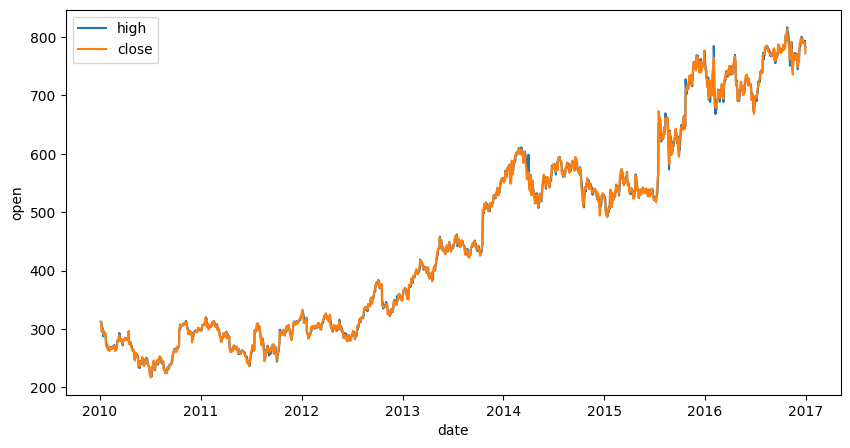

In [6]:
# Price of Google stock over time

f, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = google, y = 'open', x = 'date', label = 'high')
sns.lineplot(data = google, y = 'close', x = 'date', label = 'close')

<AxesSubplot: xlabel='date', ylabel='volume'>

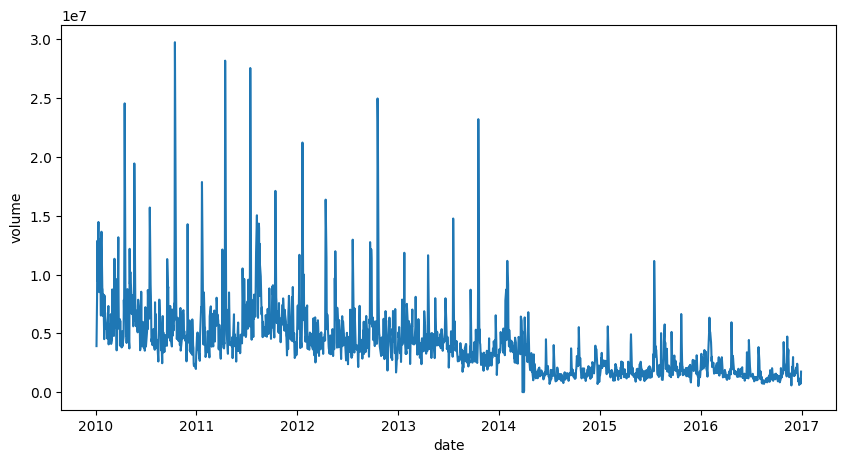

In [7]:
# Volume of Google stock over time

f, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = google, x = 'date', y = 'volume')

In [14]:
google_covid = pd.read_csv('./20AM3501 - MP.DS. Dataset/stock_prices.csv')
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.linear_model import LinearRegression
y = google_covid['Adj Close']
dp = DeterministicProcess(index = google_covid.index, constant = True, order = 3, drop = True)
X = dp.in_sample()
X.head()

,const,trend,trend_squared,trend_cubed
0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0
2,1.0,3.0,9.0,27.0
3,1.0,4.0,16.0,64.0
4,1.0,5.0,25.0,125.0


In [19]:
X_train, X_test = X[0:550], X[550:]
y_train, y_test = y[0:550], y[550:]


/var/folders/04/txrffksx67g33kqxgf84y_lh0000gn/T/ipykernel_17995/4238766009.py:8: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_test.plot(color='0.5', subplots=True, sharex=True, ax=axs)
/var/folders/04/txrffksx67g33kqxgf84y_lh0000gn/T/ipykernel_17995/4238766009.py:9: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
/var/folders/04/txrffksx67g33kqxgf84y_lh0000gn/T/ipykernel_17995/4238766009.py:10: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)


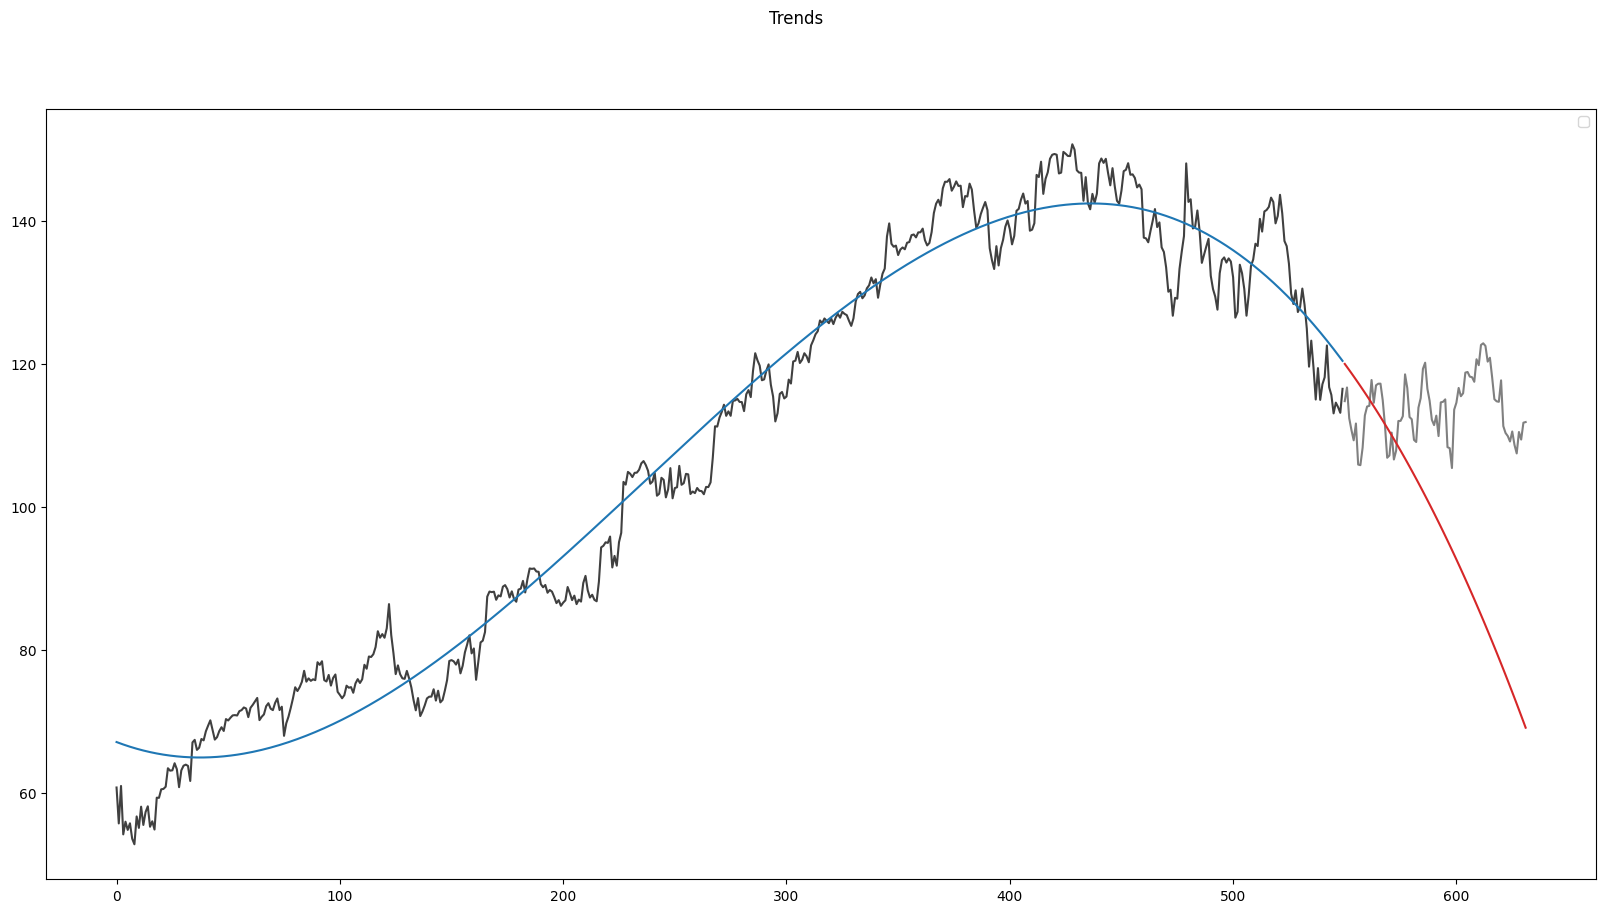

In [23]:

model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)
y_fit = pd.Series(model.predict(X_train), index = y_train.index)
y_pred = pd.Series(model.predict(X_test), index = y_test.index)

plt.figure(figsize=(20,10))
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.5', subplots=True, sharex=True, ax=axs)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle("Trends")


In [25]:
from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y_train, y_fit))
mean_absolute_percentage_error(y_test, y_pred)

0.0458670199122157


0.16070723327338088

In [ ]:
df = pd.DataFrame(googleCovid.index)
df

type(googleCovid.index)

pandas.core.indexes.range.RangeIndex

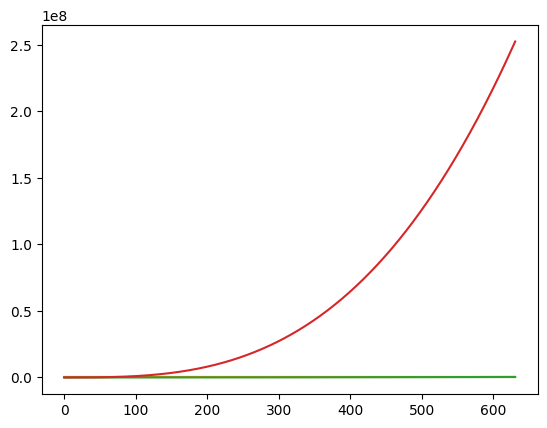

In [ ]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.linear_model import LinearRegression
y = googleCovid['Adj Close']
dp = DeterministicProcess(index = googleCovid.index, constant = True, order = 3, drop = True)
X = dp.in_sample()
plt.plot(dp.in_sample())

In [ ]:
X.shape

(632, 4)

In [ ]:
X_train, X_test = X[0:550], X[550:]
y_train, y_test = y[0:550], y[550:]

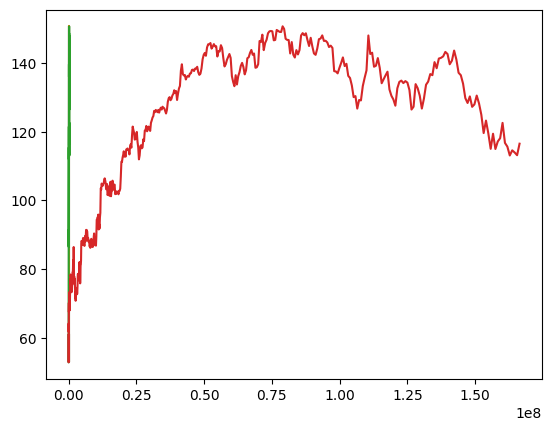

In [ ]:
plt.plot(X_train, y_train)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((550, 4), (82, 4), (550,), (82,))

In [ ]:
model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)
y_fit = pd.Series(model.predict(X_train))
# y_fit = pd.Series(model.predict(X_train), index = y_train.index)
y_pred = pd.Series(model.predict(X_test), index = y_test.index)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

C:\Users\r6nan\AppData\Local\Temp\ipykernel_25276\3388529453.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_test.plot(color='0.5', subplots=True, sharex=True, ax=axs)
C:\Users\r6nan\AppData\Local\Temp\ipykernel_25276\3388529453.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
C:\Users\r6nan\AppData\Local\Temp\ipykernel_25276\3388529453.py:5: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)


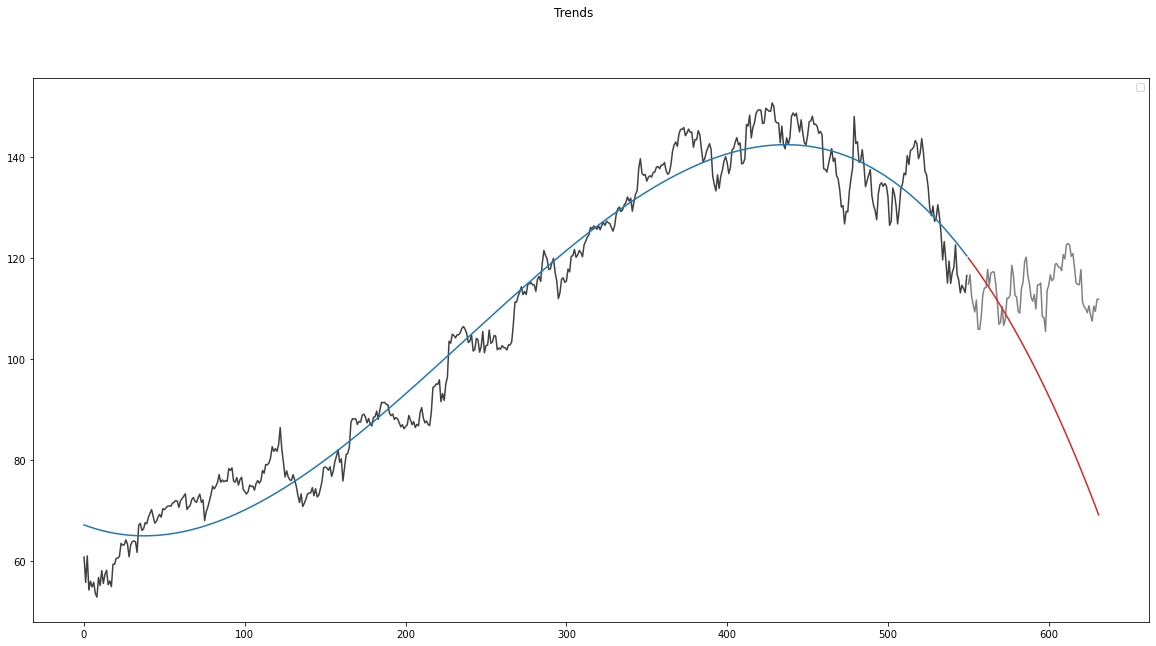

In [ ]:
plt.figure(figsize=(20,10))
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.5', subplots=True, sharex=True, ax=axs)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle("Trends")

In [40]:
from xgboost import XGBRegressor

y_resid = y_train - y_fit
xgb = XGBRegressor()
xgb.fit(X_train, y_resid)
y_fit_boosted = xgb.predict(X_train) + y_fit
y_pred_boosted = xgb.predict(X_test) + y_test

c:\Users\r6nan\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


C:\Users\r6nan\AppData\Local\Temp\ipykernel_25276\4065297607.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_test.plot(color='0.5', subplots=True, sharex=True, ax=axs)
C:\Users\r6nan\AppData\Local\Temp\ipykernel_25276\4065297607.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_fit_boosted.plot(color='C0', subplots=True, sharex=True, ax=axs)
C:\Users\r6nan\AppData\Local\Temp\ipykernel_25276\4065297607.py:5: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_pred_boosted.plot(color='C3', subplots=True, sharex=True, ax=axs)


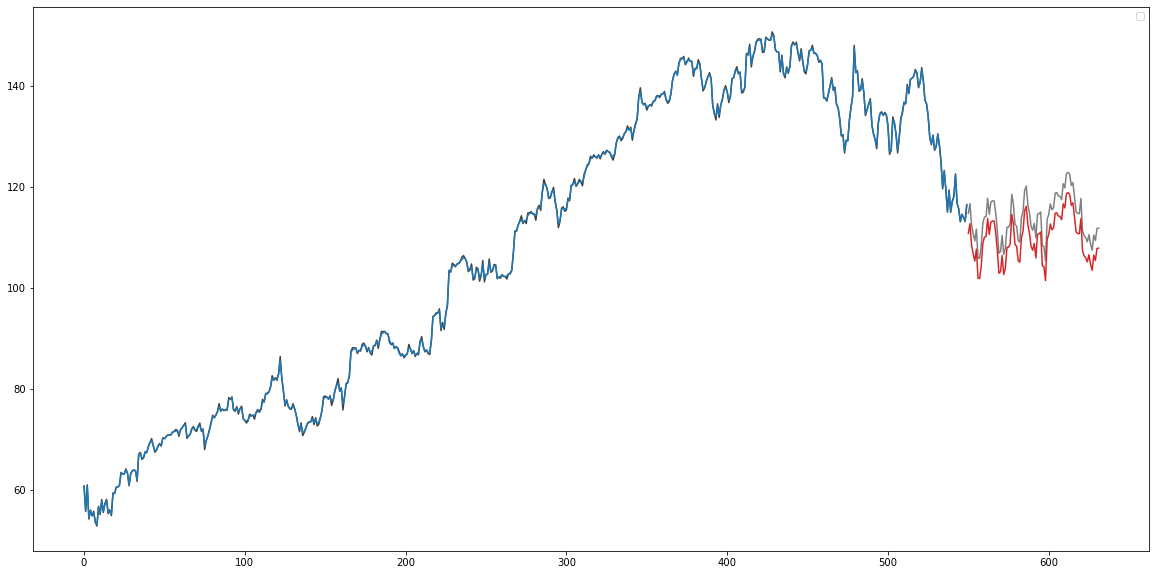

In [41]:
plt.figure(figsize=(20, 10))
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.5', subplots=True, sharex=True, ax=axs)
axs = y_fit_boosted.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred_boosted.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])

In [42]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred_boosted)

0.03506098101677391